# Supervised Learning with scikit-learn

In scikit-learn, the syntax roughly follows from what is shown below (note that 'module' and 'Model' are arbitrary):

`from sklearn.module import Model`

`model = Model()`

`model.fit(x,y)`   # where x is the predictor array and y is the array of target variables


`mdl_pred = model.predict(x_pred)`   # x_pred feeds in predictors to predict values


### CLASSIFICATION
Classifiying labels of unseen data follow these steps.
1. Building the model
2. Training the model on labeled data 
3. Pass unlabeled data to model as input
4. Model predicts labels of unseen data

Note that `labeled data = Training data`

##### k-Nearest Neighbors
A popular ML algorithm used for classification problems. The idea is to predict the label of any data point by looking at the `k` closest labeled data points and getting them to vote on what label the unlabeled observation should have. That is, KNN uses majority voting, which makes predictions based on what label the majority of nearest neighbors have. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
telco_churn = pd.read_csv('../Data/telecom_churn_clean.csv')
telco_churn.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


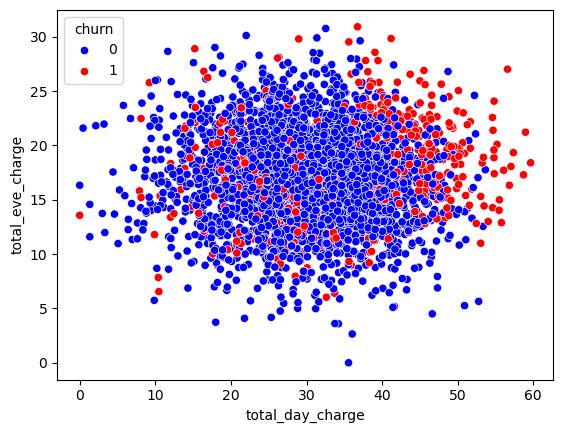

In [3]:
# Just a sample of what a scatterplot looks like when 
# plotting total charge in day vs. evening

sns.scatterplot(
    x='total_day_charge',
    y='total_eve_charge',
    data=telco_churn,
    hue='churn',
    palette={0:'blue',1:'red'}
)
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Filter the dataframe to have only day and eve charges
# This is a dataframe so call it with the .values attribute to 
# return an array of value pairs

# Notice that we are passing values as arrays now instead of series and
# dataFrames like with how we use statsmodels. This is much better, imo.

train_X = telco_churn[['total_day_charge', 'total_eve_charge']].values
train_y = telco_churn['churn'].values


In [5]:
# Verify the size of each array
print(train_X.shape, train_y.shape)

(3333, 2) (3333,)


In [6]:
# Instantiating and fitting the model. Using 15 neighbors for now
churn_knn = KNeighborsClassifier(n_neighbors=15)
churn_knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=15)

In [7]:
# Creating sample values for total day charge and total eve charge
pred_X = np.array(
    [[56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]]
)

In [8]:
churn_pred = churn_knn.predict(pred_X)
print(f'Predictions : {churn_pred}')
# The result shows that the first value pair
# is associated to with a likely possibility of churning 

Predictions : [1 0 0]


### Measuring Model Performance
The most common model performance metric is *accuracy*. Recall that accuracy is the number of correct predictions divided by the number of total predictions.

Scikit-learn offers a way to evaluate model performance by allowing us to split the dataset into train and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Data used from the telco churn dataset
# Those data will be redefined here for ease of access

train_X = telco_churn[['total_day_charge','total_eve_charge']].values
train_y = telco_churn['churn'].values

# Splitting the data 

X_train, X_test, y_train, y_test = train_test_split(
    train_X, train_y, 
    test_size=0.3,          # Common split size is 20-30% to be used for testing
    random_state=10,        # Random state is an integer seeding value to reproduce split results
    stratify=train_y        # Stratify on the target column to ensure an even ratio of y values
)

(1000, 2)


In [52]:
# Fitting and predicting using the split data 

churn_knn = KNeighborsClassifier(n_neighbors=15)

# Fit the model on the train split
churn_knn.fit(X_train, y_train)

# Get the score on the test split (unseen data)
print('Model score on test split : {}'.format(churn_knn.score(X_test, y_test)))

Model score on test split : 0.875


##### Model Complexity 
With greater `k` (number of neighbors), the decision boundary (much better visualized with a graph) is less affected by individual observations. That is, groups of datapoints will have a greater influence on classification as opposed to individual, spread-apart observations in data which results in a simple model. 

And:

**Larger *k* `=` less complex model `=` can cause underfitting**

in contrast:

**Smaller *k* `=` moreess complex model `=` can cause overfitting**

**Underfitting** is a condition in which a model cannot reliably capture relationships in the dataset. **Overfitting**, on the other hand, is when a model learns the training data too well (including noise) to the point that it cannot make generalizations on unseen data.

##### Model Complexity Curve
We can use a model complexity curve to visualize how train and test accuracy is affected by increasing values of *k*

In [11]:
# Empty dicts to store train and test accuracies
accuracies_train = {}
accuracies_test = {}

k_arr = np.arange(1, 26)  # Array of k values 

for k in k_arr:
    test_knn = KNeighborsClassifier(n_neighbors=k)
    test_knn.fit(X_train, y_train)
    accuracies_train[k] = test_knn.score(X_train, y_train)
    accuracies_test[k] = test_knn.score(X_test, y_test)



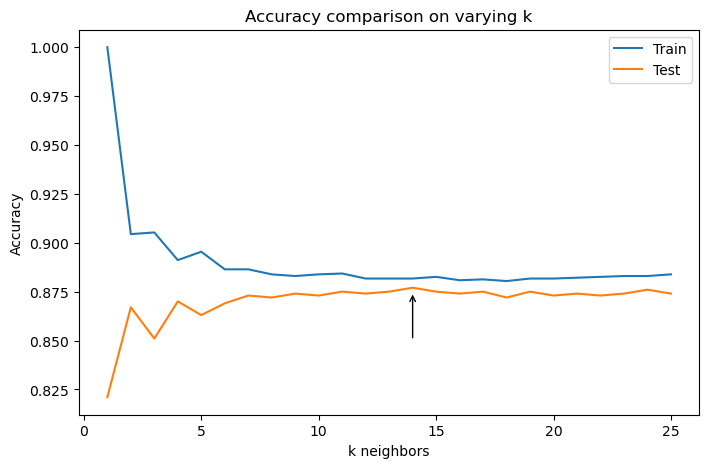

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(k_arr, accuracies_train.values(), label='Train')
ax.plot(k_arr, accuracies_test.values(), label='Test')
ax.legend()

plt.annotate(
    text='',
    xytext=(14, 0.850),
    xy=(14, 0.875),
    arrowprops={
        'facecolor':'black',
        'arrowstyle':'->',
    }
)

plt.ylabel('Accuracy')
plt.xlabel('k neighbors')
plt.title('Accuracy comparison on varying k')

plt.show()

Notice from the plot above that the peak test accuracy occurs at around `k = 13`.

### REGRESSION
Regression is another type of supervised learning where a model predicts continuous values, unlike classification which predicts discrete outceomes.

To demonstrate, we will use a diabetes dataset containing womens' health data to predict blood glucose levels using linear regression.

In [13]:
womens_health = pd.read_csv('../Data/diabetes_clean.csv')

womens_health.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*One thing to note is that logistic regression can handle multiple predictors*

In [ ]:
# Here, the predictor is bmi and the target is blood glucose

# Calling the .shape attribute on bmi gives (768,). Most sklearn 
# models, especially linear regression, expect (n_samples, n_features)
bmi = womens_health['bmi'].values       
bmi = bmi.reshape(-1, 1)                # Use np.reshape() to fix this

pred_X = bmi
target_y = womens_health['glucose'].values


bmi.shape

(768, 1)

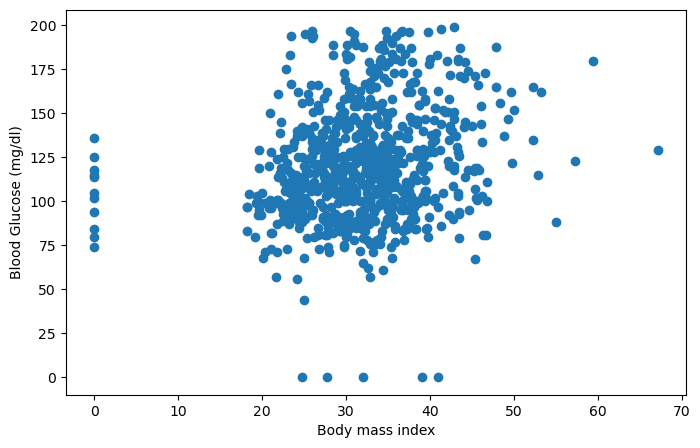

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(pred_X, target_y)

plt.xlabel('Body mass index')
plt.ylabel('Blood Glucose (mg/dl)')

plt.show()

In [ ]:
# Using linear regression
from sklearn.linear_model import LinearRegression

# No train_test_split(). Solely demonstrating linear regression for now
glc_linear = LinearRegression()
glc_linear.fit(pred_X, target_y)

LinearRegression()

In [17]:
new_pred_y = glc_linear.predict(pred_X)

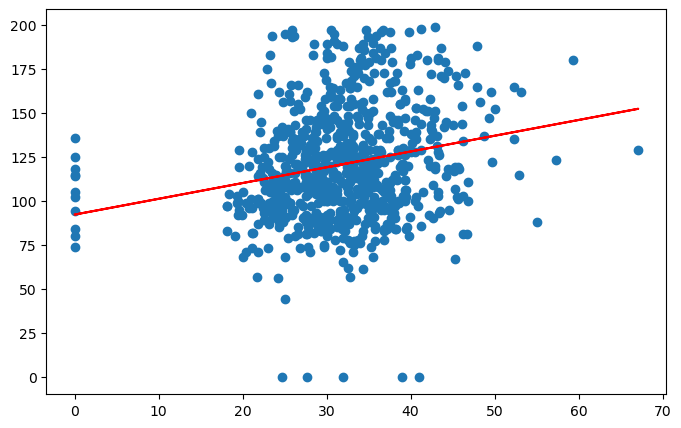

In [18]:
fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(pred_X, target_y, label='Original data')
ax.plot(pred_X, new_pred_y, label='linear fit', c='r')
plt.show()

##### Regression Mechanics

A linear regression model that follows $y = ax + b$ is a **simple** linear regression. Only one feature `x` is used to predict exactly one feature `y`. Here, `a` and `b` are the model coefficients (also called beta_0, and beta_1 in some text), which are the slope and the interecept.


##### Linear Regression in Higher Dimensions

If a model has more than one feature, it will follow from: $ y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$. Linear regression with multiple features is also known as **multiple** regression.


Recall that the coefficients, regardless of the type of linear regression, are chosen from a line that minimizes some error function (recall RSS, RSE, etc. from the statsmodels exercises).


The code below uses multiple regression where all the features from our womens' health dataset are used.

In [34]:
pred_X = womens_health.drop('glucose', axis=1).values      # Redefine pred_x to represent all features

X_train, X_test, y_train, y_test = train_test_split(pred_X, target_y, test_size=0.3, random_state=10)

glc_multiple = LinearRegression()
glc_multiple.fit(X_train, y_train)
y_predictions = glc_multiple.predict(X_test)

In [45]:
# Computing R^2 in sklearn
r_squared = glc_multiple.score(X_test, y_test)

# Computing MSE and RMSE
from sklearn.metrics import root_mean_squared_error
rmse_glc_multiple = root_mean_squared_error(y_test, y_predictions)
mse_glc_multiple = rmse_glc_multiple ** 2

# Recall that RMSE has the same unit as our original data whereas
# MSE squares the original units
print('Model R^2: ', r_squared)
print('RMSE: ', rmse_glc_multiple)
print('MSE: ', mse_glc_multiple)

Model R^2:  0.219011677405899
RMSE:  26.118349714964452
MSE:  682.1681918331836


The $R^2$ value suggests that the model only explains 22% of variance in blood glucose levels. Moreover, the average error for blood glucose is around 26mg/dl, given by the RMSE metric. The MSE value shows how far off the model's predictions are on average in squared units.